In [2]:
import os

# Change the working directory
os.chdir('d:\\10Academy\\Week0')

# Verify the current working directory
print(os.getcwd())

d:\10Academy\Week0


In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import sys

In [4]:
benData="data/benin-malanville.csv"
sierData="data/sierraleone-bumbuna.csv"
togoData="data/togo-dapaong_qc.csv"
df_ben = pd.read_csv(benData)
df_sier=pd.read_csv(sierData)
df_togo=pd.read_csv(togoData)

In [5]:
# Dropping comments column since most of it's contnent is null which is almost all
df_ben=df_ben.drop("Comments", axis=1)
df_togo=df_togo.drop("Comments", axis=1)
df_sier=df_sier.drop("Comments", axis=1)

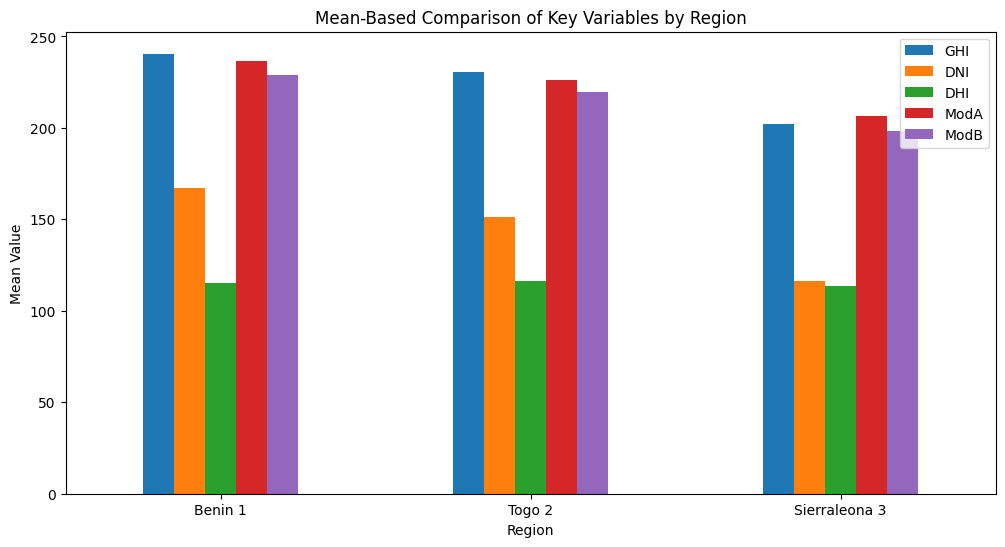

In [7]:

# Assume df_region1, df_region2, and df_region3 are your DataFrames for each region

# Step 1: Calculate the mean for each DataFrame (each region)
mean_region1 = df_ben[['GHI', 'DNI', 'DHI', "ModA",	"ModB"]].mean()
mean_region2 = df_togo[['GHI', 'DNI', 'DHI', "ModA","ModB"]].mean()
mean_region3 = df_sier[['GHI', 'DNI', 'DHI', "ModA","ModB"]].mean()

# Step 2: Create a new DataFrame for comparison
comparison_df = pd.DataFrame({
    'Benin 1': mean_region1,
    'Togo 2': mean_region2,
    'Sierraleona 3': mean_region3
})

# Transpose the DataFrame for better visualization (rows will be regions, columns will be variables)
comparison_df = comparison_df.T

# Step 3: Plot the comparison
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Mean-Based Comparison of Key Variables by Region')
plt.ylabel('Mean Value')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


# **Mean-Based Recommendations for Site Selection**

## **1. Primary Site:**
### **Benin:**
- Benin shows the highest mean values for **Global Horizontal Irradiance (GHI)** and **Diffuse Horizontal Irradiance (DHI)**, which are critical for efficient solar energy generation.
- The higher mean values of **ModA** and **ModB** suggest that Benin's environment is well-suited for consistent solar panel performance.
- The moderate mean for **Direct Normal Irradiance (DNI)**, combined with high GHI, makes Benin an optimal choice for solar installations focused on both direct and diffuse solar energy collection.

## **2. Secondary Site:**
### **Togo:**
- Togo has high mean values for **DNI**, **ModA**, and **ModB**, which are comparable to Benin.
- The balance between GHI and DNI indicates that Togo can be a strong candidate for solar installations, particularly those focusing on concentrated solar power (CSP) systems.
- Given its strong mean values across all key variables, Togo can serve as a backup or secondary priority after Benin.

## **3. Alternative Site:**
### **Sierra Leone:**
- Sierra Leone presents lower mean values for GHI, DNI, and DHI compared to Benin and Togo. However, its relatively high values for **ModA** and **ModB** suggest that solar systems here could still perform reliably under appropriate conditions.
- Sierra Leone may be more suitable for solar projects designed for less intense solar environments, such as hybrid or off-grid systems.

## **Conclusion:**
- **Primary Recommendation:** **Benin** should be prioritized for large-scale solar installations due to its superior mean GHI and DHI values.
- **Secondary Recommendation:** **Togo** is also a strong candidate, especially for installations requiring high DNI.
- **Alternative Consideration:** **Sierra Leone** can be considered for specialized or lower-intensity solar projects, leveraging its mean values for consistent system performance.


### Time Series Resampling Overview

Time series resampling is a key technique for aggregating and analyzing data over different intervals, helping to uncover broader trends that might be missed in granular data.

- **Daily Resampling**: Identifies day-to-day variations and outliers.
- **Monthly Resampling**: Reveals long-term seasonal patterns, vital for strategic solar investments.

The goal is to create time series plots for each region and compare the evolution of these variables over time, either daily or monthly. 

By utilizing resampling, MoonLight Energy Solutions can better understand solar radiation trends, aiding in the identification of high-potential regions for solar installation and supporting sustainability goals.


In [13]:

df_ben["Timestamp"]=pd.to_datetime(df_ben["Timestamp"])
df_togo["Timestamp"]=pd.to_datetime(df_togo["Timestamp"])
df_sier["Timestamp"]=pd.to_datetime(df_sier["Timestamp"])

df_ben.set_index("Timestamp", inplace=True)
df_togo.set_index("Timestamp", inplace=True)
df_sier.set_index("Timestamp", inplace=True)

C:\Users\Coop\AppData\Local\Temp\ipykernel_16800\232554392.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region1_monthly = df_ben[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('M').mean()
C:\Users\Coop\AppData\Local\Temp\ipykernel_16800\232554392.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region2_monthly = df_togo[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('M').mean()
C:\Users\Coop\AppData\Local\Temp\ipykernel_16800\232554392.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  region3_monthly = df_sier[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('M').mean()


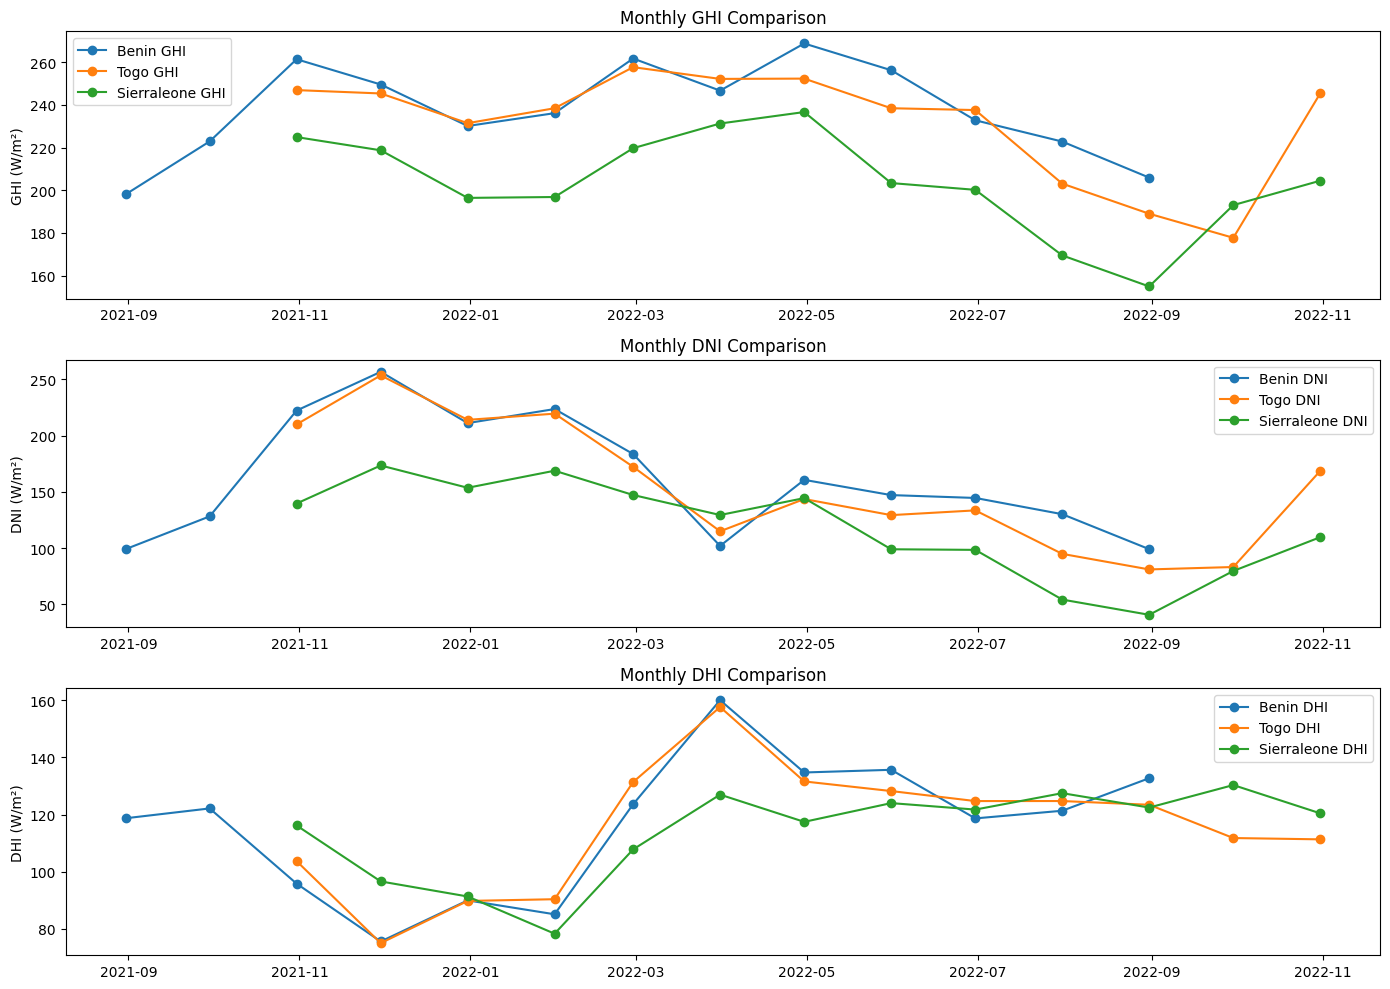

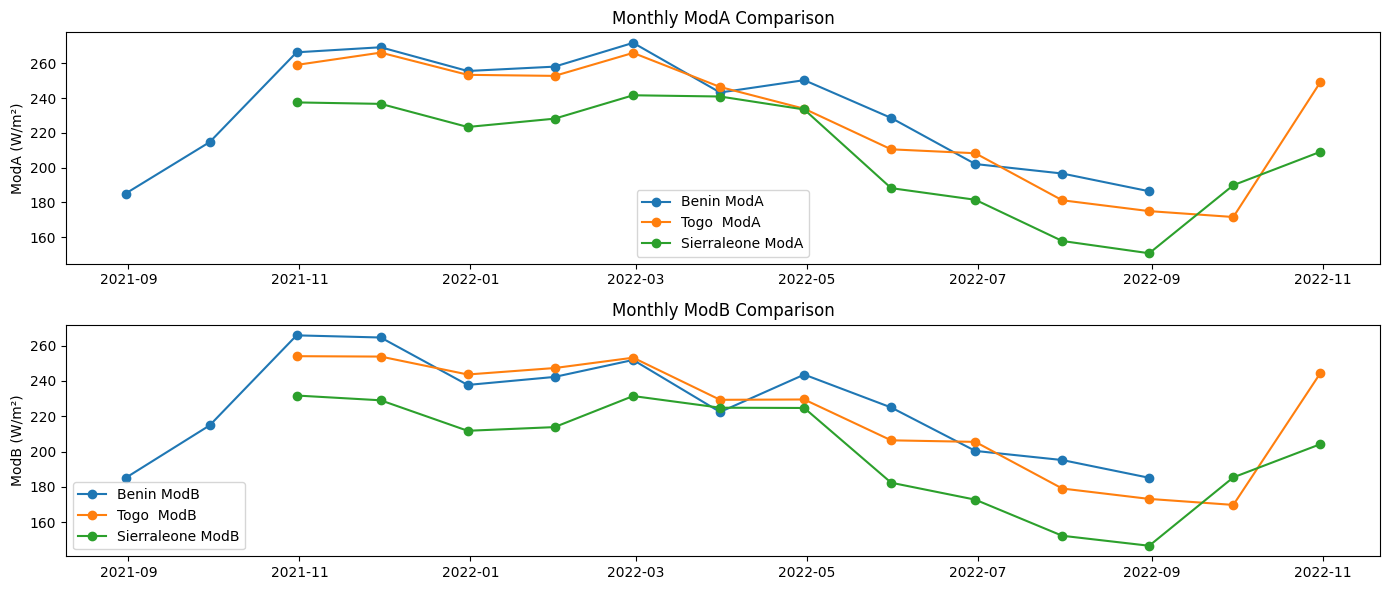

In [14]:


# Step 1: Resample the data by month and calculate the mean for the relevant columns
region1_monthly = df_ben[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('M').mean()
region2_monthly = df_togo[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('M').mean()
region3_monthly = df_sier[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('M').mean()


# Step 2: Plot the time series for comparison

plt.figure(figsize=(14, 10))

# GHI Comparison
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st plot
plt.plot(region1_monthly.index, region1_monthly['GHI'], label='Benin GHI', marker='o')
plt.plot(region2_monthly.index, region2_monthly['GHI'], label='Togo GHI', marker='o')
plt.plot(region3_monthly.index, region3_monthly['GHI'], label='Sierraleone GHI', marker='o')
plt.title('Monthly GHI Comparison')
plt.ylabel('GHI (W/m²)')
plt.legend()

# DNI Comparison
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd plot
plt.plot(region1_monthly.index, region1_monthly['DNI'], label='Benin DNI', marker='o')
plt.plot(region2_monthly.index, region2_monthly['DNI'], label='Togo DNI', marker='o')
plt.plot(region3_monthly.index, region3_monthly['DNI'], label='Sierraleone DNI', marker='o')
plt.title('Monthly DNI Comparison')
plt.ylabel('DNI (W/m²)')
plt.legend()

# DHI Comparison
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd plot
plt.plot(region1_monthly.index, region1_monthly['DHI'], label='Benin DHI', marker='o')
plt.plot(region2_monthly.index, region2_monthly['DHI'], label='Togo DHI', marker='o')
plt.plot(region3_monthly.index, region3_monthly['DHI'], label='Sierraleone DHI', marker='o')
plt.title('Monthly DHI Comparison')
plt.ylabel('DHI (W/m²)')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Step 3: Plot ModA and ModB in a similar way
plt.figure(figsize=(14, 6))

# ModA Comparison
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.plot(region1_monthly.index, region1_monthly['ModA'], label='Benin ModA', marker='o')
plt.plot(region2_monthly.index, region2_monthly['ModA'], label='Togo  ModA', marker='o')
plt.plot(region3_monthly.index, region3_monthly['ModA'], label='Sierraleone ModA', marker='o')
plt.title('Monthly ModA Comparison')
plt.ylabel('ModA (W/m²)')
plt.legend()

# ModB Comparison
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
plt.plot(region1_monthly.index, region1_monthly['ModB'], label='Benin ModB', marker='o')
plt.plot(region2_monthly.index, region2_monthly['ModB'], label='Togo  ModB', marker='o')
plt.plot(region3_monthly.index, region3_monthly['ModB'], label='Sierraleone ModB', marker='o')
plt.title('Monthly ModB Comparison')
plt.ylabel('ModB (W/m²)')
plt.legend()

plt.tight_layout()
plt.show()


# Recommendations for Site Selection

## 1. Primary Sites
Benin and Togo should be prioritized for solar installations due to their higher and more consistent **Global Horizontal Irradiance (GHI)** and **Direct Normal Irradiance (DNI)** values. These factors are crucial for maximizing energy output and overall system efficiency.

- **Benin**: Demonstrates slightly higher peaks in GHI and DNI compared to Togo, making it an optimal choice for solar investments.
- **Togo**: While slightly lower than Benin, Togo still maintains strong GHI and DNI values and is a reliable site for solar installations.

## 2. Secondary Sites
**Sierra Leone**, despite having lower GHI and DNI values, should still be considered for solar projects, particularly those tailored to lower-intensity solar environments. Potential approaches include:

- **Hybrid Systems**: Combining solar with other energy sources to optimize energy output.
- **Off-Grid Solutions**: Focusing on smaller, decentralized energy systems where lower irradiance can still provide meaningful benefits.

## 3. Seasonal Considerations
Given the observed seasonal variations in GHI, DNI, and **Diffuse Horizontal Irradiance (DHI)** across the regions, it is important to account for these fluctuations when selecting sites and designing systems.

- **Benin**: Offers more stable energy production throughout the year but still requires careful planning to manage seasonal variations.
- **Togo**: Similar to Benin but with slightly more variability, which should be factored into system design.
- **Sierra Leone**: Greater seasonal fluctuations make energy storage solutions or increased capacity essential to balance output during periods of lower solar radiation.

## Final Recommendation
While both Benin and Togo are excellent choices, **Benin** is slightly favored due to its higher peaks in GHI and DNI, offering a marginally better opportunity for maximizing solar energy production.


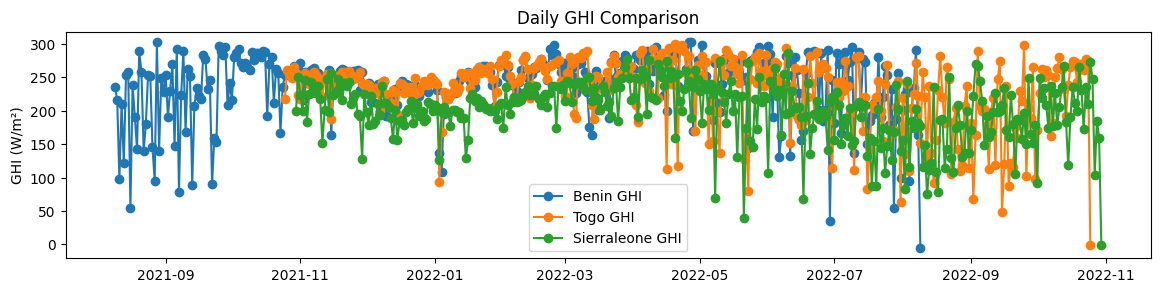

In [16]:
# Resample by day instead of month
region1_daily = df_ben[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('D').mean()
region2_daily = df_togo[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('D').mean()
region3_daily =df_sier[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].resample('D').mean()

# Plot daily time series in a similar way
plt.figure(figsize=(14, 10))

# GHI Comparison (Daily)
plt.subplot(3, 1, 1)
plt.plot(region1_daily.index, region1_daily['GHI'], label='Benin GHI', marker='o')
plt.plot(region2_daily.index, region2_daily['GHI'], label='Togo GHI', marker='o')
plt.plot(region3_daily.index, region3_daily['GHI'], label='Sierraleone GHI', marker='o')
plt.title('Daily GHI Comparison')
plt.ylabel('GHI (W/m²)')
plt.legend()

# Repeat for DNI and DHI, ModA, and ModB as shown above


# **Summary and Recommendations for Solar Site Selection**

## **Time Series Analysis:**
- **Primary Sites:** Both **Benin** and **Togo** display higher and more consistent values of **Global Horizontal Irradiance (GHI)** and **Direct Normal Irradiance (DNI)** over time. These regions should be prioritized for solar installations, as they offer optimal conditions for energy generation throughout the year.
- **Secondary Site:** **Sierra Leone** shows lower GHI and DNI values across the time series. However, it could still be suitable for solar projects that can operate efficiently under lower solar irradiance, particularly in off-grid or hybrid systems.

## **Mean Value Analysis:**
- **Benin** emerges as the top candidate with the highest mean values for **GHI** and **Diffuse Horizontal Irradiance (DHI)**, making it ideal for both concentrated and distributed solar energy systems.
- **Togo** also demonstrates strong mean values, particularly in **DNI**, which makes it a suitable alternative for projects focusing on concentrated solar power (CSP).
- **Sierra Leone** has lower mean values across key variables but still maintains consistent performance, making it a viable option for specialized solar projects.

## **Recommendations:**
1. **Prioritize Benin** for large-scale solar installations, considering its superior solar irradiance metrics.
2. **Consider Togo** as a secondary site, especially for CSP systems due to its high DNI values.
3. **Include Sierra Leone** for targeted projects that can utilize lower solar irradiance effectively, such as hybrid or off-grid installations.

These recommendations are designed to maximize energy output and align with long-term sustainability goals.
